+ goal:The local stability analysis of the 4-node star system (electricity producer is in the center) implementing Decentral Smart Grid Control concept.(实施分散智能电网控制的四节点星型系统(以发电厂为中心)的局部稳定性分析)
+ Attribute Information:(11 predictive attributes, 1 non-predictive(p1), 2 goal fields:)
    + 1. tau[x]: reaction time of participant (real from the range [0.5,10]s). Tau1 - the value for electricity producer.
    + 2. p[x]: nominal power consumed(negative)/produced(positive)(real). For consumers from the range [-0.5,-2]s^-2; p1 = abs(p2 + p3 + p4)
    + 3. g[x]: coefficient (gamma) proportional to price elasticity (real from the range [0.05,1]s^-1). g1 - the value for electricity producer.
    + 4. stab: the maximal real part of the characteristic equation root (if positive - the system is linearly unstable)(real)
    + 5. stabf: the stability label of the system (categorical: stable/unstable)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Import the data using Pandas framework 

In [55]:
data = pd.read_csv("Data_for_UCI_named.csv")
data.head(10)

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
5  6.999209  9.109247  3.784066  4.267788  4.429669 -1.857139 -0.670397   
6  6.710166  3.765204  6.929314  8.818562  2.397419 -0.614590 -1.208826   
7  6.953512  1.379125  5.719400  7.870307  3.224495 -0.748998 -1.186517   
8  4.689852  4.007747  1.478573  3.733787  4.041300 -1.410344 -1.238204   
9  9.841496  1.413822  9.769856  7.641616  4.727595 -1.991363 -0.857637   

         p4        g1        g2        g3        g4      stab     stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  unstable  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957    stable  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  unstable  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  unstable  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860  unstable  
5 -1.902133  0.261793  0.077930  0.542884  0.469931 -0.017385    stable  
6 -0.574004  0.177890  0.397977  0.402046  0.376630  0.005954  unstable  
7 -1.288980  0.371385  0.633204  0.732741  0.380544  0.016634  unstable  
8 -1.392751  0.269708  0.250364  0.164941  0.482439 -0.038677    stable  
9 -1.878594  0.376356  0.544415  0.792039  0.116263  0.012383  unstable

# Describe the data and define the corresponding machine learning task.

+ 调用descrbe()函数查看data的数学属性(平均值、最大最小值)

In [34]:
data.describe()

tau1          tau2          tau3          tau4            p1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       5.250000      5.250001      5.250004      5.249997      3.750000   
std        2.742548      2.742549      2.742549      2.742556      0.752160   
min        0.500793      0.500141      0.500788      0.500473      1.582590   
25%        2.874892      2.875140      2.875522      2.874950      3.218300   
50%        5.250004      5.249981      5.249979      5.249734      3.751025   
75%        7.624690      7.624893      7.624948      7.624838      4.282420   
max        9.999469      9.999837      9.999450      9.999443      5.864418   

                 p2            p3            p4            g1            g2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -1.250000     -1.250000     -1.250000      0.525000      0.525000   
std        0.433035      0.433035      0.433035      0.274256      0.274255   
min       -1.999891     -1.999945     -1.999926      0.050009      0.050053   
25%       -1.624901     -1.625025     -1.624960      0.287521      0.287552   
50%       -1.249966     -1.249974     -1.250007      0.525009      0.525003   
75%       -0.874977     -0.875043     -0.875065      0.762435      0.762490   
max       -0.500108     -0.500072     -0.500025      0.999937      0.999944   

                 g3            g4          stab  
count  10000.000000  10000.000000  10000.000000  
mean       0.525000      0.525000      0.015731  
std        0.274255      0.274255      0.036919  
min        0.050054      0.050028     -0.080760  
25%        0.287514      0.287494     -0.015557  
50%        0.525015      0.525002      0.017142  
75%        0.762440      0.762433      0.044878  
max        0.999982      0.999930      0.109403

# In case of missing values fill them appropriately.
+ 从info()函数我们可以知道，数据集比较干净，没有空值

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


# Convert all textual features into a numerical representation if necessary
+ 我们将stabf进行转换---stable(0) unstable(1)# 

In [56]:
data['stabf'] = data['stabf'].apply(lambda x: 1 if x=='stable' else 0 )
data.head(10)

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   
5  6.999209  9.109247  3.784066  4.267788  4.429669 -1.857139 -0.670397   
6  6.710166  3.765204  6.929314  8.818562  2.397419 -0.614590 -1.208826   
7  6.953512  1.379125  5.719400  7.870307  3.224495 -0.748998 -1.186517   
8  4.689852  4.007747  1.478573  3.733787  4.041300 -1.410344 -1.238204   
9  9.841496  1.413822  9.769856  7.641616  4.727595 -1.991363 -0.857637   

         p4        g1        g2        g3        g4      stab  stabf  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347      0  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957      1  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471      0  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871      0  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860      0  
5 -1.902133  0.261793  0.077930  0.542884  0.469931 -0.017385      1  
6 -0.574004  0.177890  0.397977  0.402046  0.376630  0.005954      0  
7 -1.288980  0.371385  0.633204  0.732741  0.380544  0.016634      0  
8 -1.392751  0.269708  0.250364  0.164941  0.482439 -0.038677      1  
9 -1.878594  0.376356  0.544415  0.792039  0.116263  0.012383      0

# Collect useful data statistics and present them 

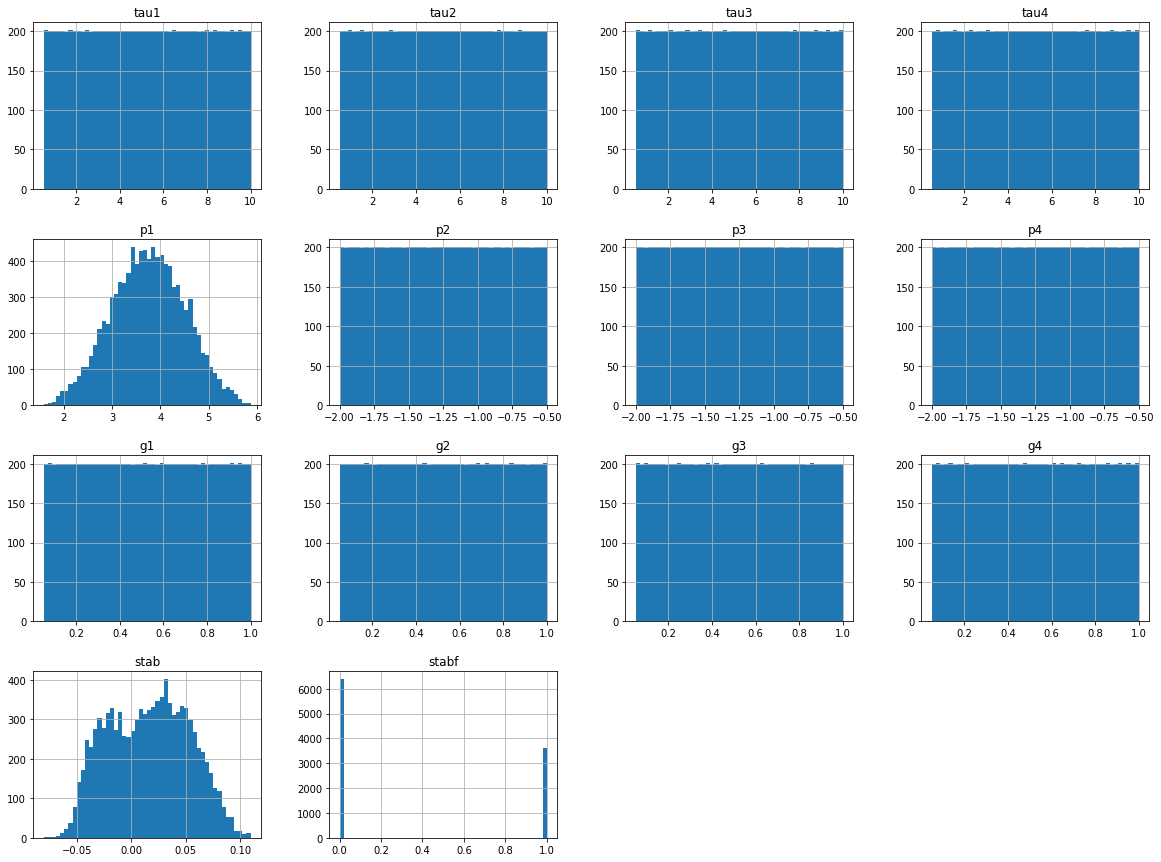

In [57]:
#将所有数据可视化
#纵轴表示数量  横轴表示数量
# 我们可以发现只有p1和stab数据分布不太均匀
data.hist(bins=50,figsize=(20,15))
plt.show()

In [60]:
##进行相关性研究
##防止处理好的数据被污染  我们复制副本
data1 = data.copy()
# 通过corr函数求的行数据之间的相关性  
corr_matrics = data1.corr()
# 只展示stab属性的相关性
corr_matrics["stab"].sort_values(ascending = False)

stab     1.000000
g3       0.308235
g2       0.293601
tau2     0.290975
g1       0.282774
tau3     0.280700
g4       0.279214
tau4     0.278576
tau1     0.275761
p1       0.010278
p2       0.006255
p3      -0.003321
p4      -0.020786
stabf   -0.826959
Name: stab, dtype: float64

<AxesSubplot:title={'center':'Correlation of Numeric Features with stab'}>

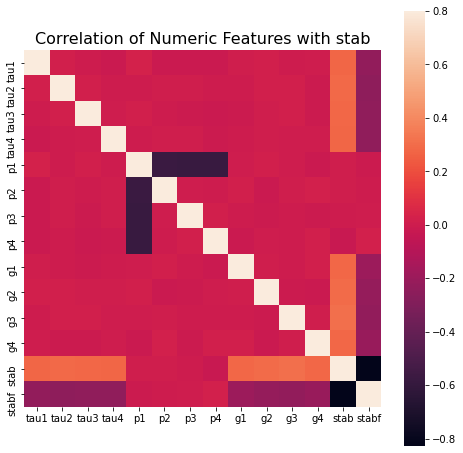

In [63]:
#绘制相关性热力图
import seaborn as sns
f , ax = plt.subplots(figsize = (8, 8))
plt.title('Correlation of Numeric Features with stab',y=1,size=16)
sns.heatmap(corr_matrics,square = True,  vmax=0.8)

# Split data into train, validation and test sets

In [67]:
#因为我们进行数据回归任务  所以不需要stabf的标签
fin_data = data1.drop(["stabf"],axis=1)
fin_data.head()

tau1      tau2      tau3      tau4        p1        p2        p3  \
0  2.959060  3.079885  8.381025  9.780754  3.763085 -0.782604 -1.257395   
1  9.304097  4.902524  3.047541  1.369357  5.067812 -1.940058 -1.872742   
2  8.971707  8.848428  3.046479  1.214518  3.405158 -1.207456 -1.277210   
3  0.716415  7.669600  4.486641  2.340563  3.963791 -1.027473 -1.938944   
4  3.134112  7.608772  4.943759  9.857573  3.525811 -1.125531 -1.845975   

         p4        g1        g2        g3        g4      stab  
0 -1.723086  0.650456  0.859578  0.887445  0.958034  0.055347  
1 -1.255012  0.413441  0.862414  0.562139  0.781760 -0.005957  
2 -0.920492  0.163041  0.766689  0.839444  0.109853  0.003471  
3 -0.997374  0.446209  0.976744  0.929381  0.362718  0.028871  
4 -0.554305  0.797110  0.455450  0.656947  0.820923  0.049860

In [141]:
#按照4：1的比例分割出训练集和测试集
#打乱训练集顺序

# X = fin_data.drop(["stab"],axis=1)
X = fin_data.drop(["p2","p3","stab"],axis=1)
Y = fin_data["stab"]
x_train,x_test,y_train,y_test = X[:8000],X[8000:],Y[:8000],Y[8000:]

#对数据进行洗牌：避免数据投入的顺序对网络模型造成影响(增加随机性 增强模型泛化能力)
import numpy as np
shuffle_index = np.random.permutation(8000)
x_train,y_train = x_train.iloc[shuffle_index],y_train.iloc[shuffle_index]

#Depict the lower dimensional data representation of the train set
#从下图可以清晰的看出我们需要训练的属性

# Perform data regression using at least two different methods with hyperparameter tuning using the validation set
+ Ridge回归和ElasticNet

In [144]:
#岭回归
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(x_train, y_train)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [145]:
#ElasticNet
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

# Compare the regressors using RMSE metric.
Depict histograms of the value distributions for the data targets and predictions

In [146]:
#ridge的RMSE (1 0.022520750727250325)
from sklearn.metrics import mean_squared_error
ridge_prediction = ridge_reg.predict(x_test)
ridge_mse = mean_squared_error(y_test,ridge_prediction)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.022511579721905345

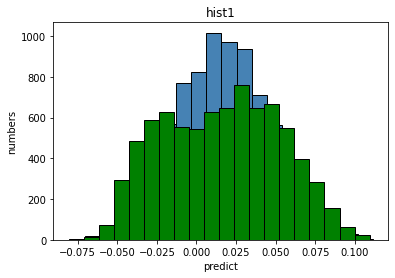

In [147]:
# matplotlib模块绘制直方图

# 绘制直方图
plt.hist(x = ridge_reg.predict(x_train), # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

plt.hist(x = y_train, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'green', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
# 添加x轴和y轴标签
plt.xlabel('predict')
plt.ylabel('numbers')
# 添加标题
plt.title('hist1')
# 显示图形


plt.show()

In [148]:
#elastic_net的RMSE (1 0.03684885968224877)
from sklearn.metrics import mean_squared_error
elastic_prediction = elastic_net.predict(x_test)
elastic_mse = mean_squared_error(y_test,elastic_prediction)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

0.03684816574923141

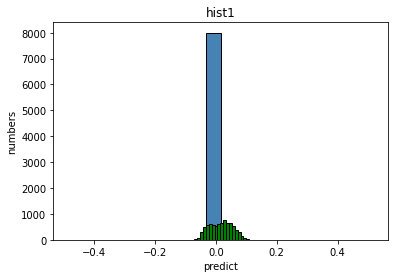

In [149]:
# matplotlib模块绘制直方图

# 绘制直方图
plt.hist(x = elastic_net.predict(x_train), # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'steelblue', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )

plt.hist(x = y_train, # 指定绘图数据
         bins = 20, # 指定直方图中条块的个数
         color = 'green', # 指定直方图的填充色
         edgecolor = 'black' # 指定直方图的边框色
         )
# 添加x轴和y轴标签
plt.xlabel('predict')
plt.ylabel('numbers')
# 添加标题
plt.title('hist1')
# 显示图形


plt.show()

In [150]:
#使用交叉验证进一步进行评估

from sklearn.model_selection import cross_val_score
scores_ridge = cross_val_score(ridge_reg,x_train,y_train,scoring="neg_mean_squared_error",cv=10)
scores_net = cross_val_score(elastic_net,x_train,y_train,scoring="neg_mean_squared_error",cv=10)

D:\9_anaconda\envs\Learn\lib\site-packages\sklearn\model_selection\_split.py:428: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = (n_samples // n_splits) * np.ones(n_splits, dtype=np.int)
D:\9_anaconda\envs\Learn\lib\site-packages\sklearn\model_selection\_split.py:108: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20

In [151]:
#交叉验证不仅能得出模型性能的评估值 还能得到其精确度
def display_scores(scores):
    print("scores:",scores)
    print("Mean  :",scores.mean())
    print("Standard deviation:",scores.std())
    
display_scores(scores_ridge)

scores: [-0.0004945  -0.00051872 -0.00046108 -0.00047722 -0.0004575  -0.00046564
 -0.00050872 -0.00047234 -0.0004472  -0.00046192]
Mean  : -0.0004764836854869122
Standard deviation: 2.224932836045352e-05


In [152]:
display_scores(scores_net)

scores: [-0.00132585 -0.00141853 -0.00138516 -0.00139644 -0.00132025 -0.00137262
 -0.00135586 -0.0013959  -0.00133563 -0.00133849]
Mean  : -0.001364472831859574
Standard deviation: 3.233351208847792e-05


# Select the best method and report the results achieved on the test set

整体思路：
    + 调用read_csv函数csv文件数据，并进行查看前十行数据内容
    + 调用describe函数查看数据集数学属性(平均值、最大最小值)
    + 调用info函数查看数据集信息：个列数据类型 数据是否存在空值。调用后%macro现数据集比较干净，并没有空值
    + 从前几步我们可以发现，scorestabf列为object类型，我们将其转换为int类型
    + 将所有数据可视化，横轴为数据大小，纵轴为数据数量，图像符合前几步所的信息。
        + 我们可以发现只有p1和stab数据分布不太均匀+ 
        + 进行相关性研究 研究其他属性与stab的相关性 绘制相关性热力图(将相关性可视化)
        + 可以发现 p2 p3 列与stab的相关性并不强 %who们可以将其删除
    + 因为我们进行数据回归任务  所以不需要stabf的标签
    + 按照4：1的比例分割出训练集和测试集 并打乱数据集
        + 因为后续我们会进行交叉验证 我们就不进行验证集划分 
        + (也可以在打乱顺序之后 以1：4或者1：9的比例划分验证集) 
    + 我们选择Lasso回归和ElasticNet两个模型进行训练
    + 两个模型的RMSE分数如下 很明显ridge模型效果更加好
    + 我们绘制数据目标和预测值分布的直方图 我们可以发现Ridge更加符合目标 
    + 使用交叉验证进一步对模型进行评估(交叉验证不仅能得出模型性能的评估值 还能得到其精确度)
    + 根据上述分析，我们选择RIDGE回归为最终使用的模型

In [ ]:
#测试集上预测的结果
ridge_reg.predict(x_test)